<a href="https://colab.research.google.com/github/christine127/K-Digital-Fintech/blob/main/ta_lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-datareader
!pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=1eb405c407cb8490f993023fa3069beec9fc030a0297b9419a70cc56c4db8c5b
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [2]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
import FinanceDataReader as fdr
from ta.trend import ADXIndicator, adx, adx_pos , adx_neg

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)

In [4]:
order_info = pd.read_excel('/content/drive/MyDrive/ASIAE/2021 금융데이터 경진대회_샘플_한국투자증권 (1).xlsx')

## ADX

In [6]:
def implement_adx_strategy(prices, pdi, ndi, adx):
  buy_price= []
  sell_price = [] 
  adx_signal = []
  signal = 0

  for i in range(len(prices)):
    if adx[i-1] < 25 and adx[i] > 25 and pdi[i] > ndi[i]:
      if signal != 1:
        buy_price.append(prices[i])
        sell_price.append(np.nan)
        singal =1
        adx_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        adx_signal.append(0)
    elif adx[i-1] <25 and adx[i] >25 and ndi[i] > pdi[i]:
      if signal != -1:
        buy_price.append(np.nan)
        sell_price.append(prices[i])
        signal = -1
        adx_signal.append(signal)
      else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        adx_signal.append(0)
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)
      adx_signal.append(0)
  
  return buy_price, sell_price, adx_signal

In [7]:
def ADX_visualization(code, window =14, plot = False):
  buy_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==2)]['주문일자'], format = '%Y%m%d')
  sell_date = pd.to_datetime(order_info[(order_info['상품번호'] == '00000A'+code) &
           (order_info['고객번호'] == 'C00010') &
           (order_info['매도매수구분코드']==1)]['주문일자'], format = '%Y%m%d')
  
  stock = fdr.DataReader(code, '2020-01-05','2020-03-31')
  stock['ADX']= adx(stock['High'],stock['Low'],stock['Close'], window= window)
  stock['PDI'] = adx_pos(stock['High'],stock['Low'],stock['Close'],window= window)
  stock['MDI'] = adx_neg(stock['High'],stock['Low'],stock['Close'],window= window)
  stock = stock.iloc[window+1:,:]
  
  buy_price, sell_price, adx_signal = implement_adx_strategy(stock['Close'], stock['PDI'],stock['MDI'], stock['ADX'])

  if plot == True:
    plt.figure(figsize=(15,7.5))
    ax1 = plt.subplot2grid((11,1),(0,0), rowspan = 5, colspan=1)
    ax2 = plt.subplot2grid((11,1),(6,0), rowspan = 5, colspan=1)
    ax1.plot(stock['Close'], linewidth =2, color = '#ff9800')
    ax1.set_title('CLOSING PRICE')
    ax1.plot(stock.index, buy_price, marker = '^', color = '#26a69a', markersize =14, linewidth = 0 , label = 'BUY SIGNAL')
    ax1.plot(stock.index, sell_price, marker = 'v', color = '#f44336', markersize =14, linewidth = 0 , label = 'SELL SIGNAL')
    ax1.plot(stock.loc[buy_date,'Close'] , marker = '*', color = 'purple',markersize =14, linewidth = 0, label = 'real_buy', alpha = 0.3)
    ax1.plot(stock.loc[sell_date,'Close'] , marker = 'o', color = 'orange',markersize =14, linewidth = 0, label = 'real_sell', alpha = 0.3)
    ax1.legend()

    ax2.plot(stock['PDI'], linewidth =3, color = '#26a69a', label = '+DI '+str(window), alpha =0.3)
    ax2.plot(stock['MDI'], linewidth =3, color = '#f44336', label = '-DI '+str(window), alpha =0.3)
    ax2.plot(stock['ADX'], linewidth =3, color = '#2196f3', label = 'ADX '+str(window))
    ax2.axhline(25, color = 'grey', linewidth=2, linestyle = '--')
    ax2.legend()
    ax2.set_title('ADX '+str(window))
    plt.show()

  return stock

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


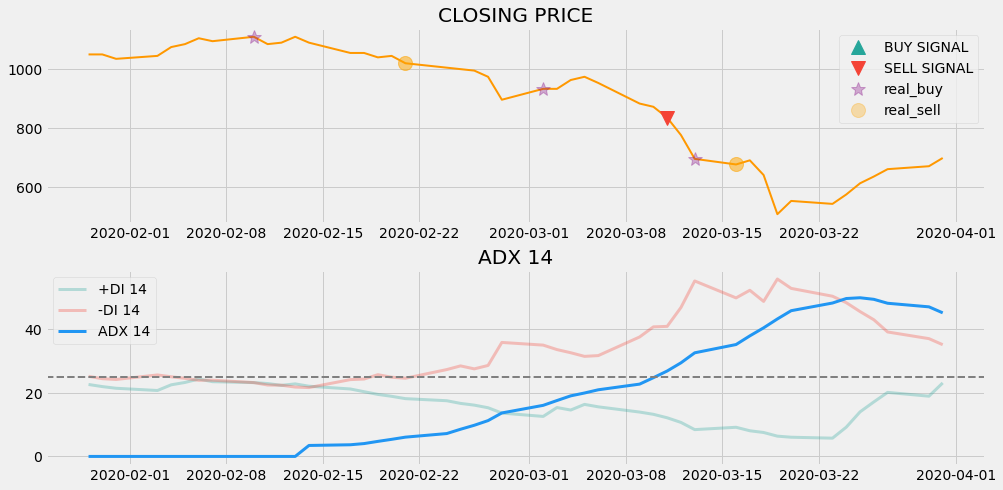

,Open,High,Low,Close,Volume,Change,ADX,PDI,MDI
Date,,,,,,,,,
2020-01-29,1050,1085,1035,1050,6222474,0.000000,0.000000,22.602892,25.161290
2020-01-30,1045,1080,1035,1050,3820993,0.000000,0.000000,21.940564,24.423994
2020-01-31,1045,1065,1030,1035,2905902,-0.014286,0.000000,21.414950,24.181119
2020-02-03,1015,1045,999,1045,3136006,0.009662,0.000000,20.712640,25.598210
2020-02-04,1045,1075,1045,1075,2645217,0.028708,0.000000,22.497787,25.021869
2020-02-05,1080,1090,1065,1085,2171983,0.009302,0.000000,23.240537,24.526298
2020-02-06,1085,1110,1080,1105,2945419,0.018433,0.000000,24.324281,23.914219
2020-02-07,1105,1110,1070,1095,1949721,-0.009050,0.000000,23.482791,23.951781
2020-02-10,1085,1115,1080,1110,2157491,0.013699,0.000000,23.192443,23.195631


In [8]:
ADX_visualization('002360',14,plot = True)